In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import tensorflow.keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
data.describe()

,z,hz,err
count,31.000000,31.000000,31.000000
mean,0.661219,105.922581,21.303226
std,0.520398,38.413424,14.587768
min,0.070000,68.600000,4.000000
25%,0.275000,78.950000,12.000000
50%,0.470000,90.000000,17.000000
75%,0.890000,121.000000,27.900000
max,1.965000,202.000000,62.000000


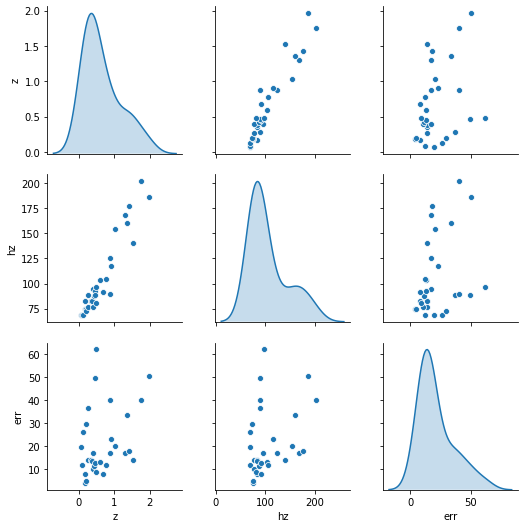

In [4]:
sns.pairplot(data, diag_kind="kde")
plt.savefig("DistHD.png")

In [5]:
# a = np.array([25,  3,  9,  7, 19,  2, 17, 16,  6, 28, 12, 20, 21, 26, 27, 11,  1,
#        10, 30, 13, 29,  0,  8, 18, 24,  5, 23,  4, 22, 15, 14])
# randomize = np.random.permutation(len(data.values))
shuffle = [x for x in range(len(data.values)) if x%2 ==0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# shuffle

In [6]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)


Read the data for cosmic chronometers

In [7]:

# odds = [x for x in range(len(data)) if x%2 ==0]
# even = [x for x in range(len(data)) if x%2 ==1]
# new_order = np.array(even+odds)
# new_order = np.array([x for x in range(len(data)-1, 0, -1)])
# data = data.values[new_order]
# data = data.values


In [8]:
z = data[:,0]
y = data[:,1:]
# print(randomize)

In [9]:
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
z = scalerz.transform(z.reshape(-1,1))

# scalery = MinMaxScaler(feature_range=(0,1))
# scalery = StandardScaler()
# scalery.fit(y)
# y = scalery.transform(y)

In [10]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)
y_train, y_test = np.split(y, indx)

In [11]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]
#                      tf.keras.callbacks.ReduceLROnPlateau(patience=2)]
# initializer = Constant(value=0.01)
# initializer = RandomNormal()
#     efirst = Dense(150, activation='relu', input_shape=(1,))(input_z)
#     ehidden = Dense(50, activation='relu')(efirst)
# #     ehidden = Dense(150, activation='relu')(efirst)
#     ehidden2 = Dense(150, activation='relu')(ehidden)
#     ehidden2 = Dense(150, activation='relu')(ehidden2)
#     elast = Dense(2, activation='relu')(ehidden2)



In [12]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    ehidden = Dense(200, activation='relu')(efirst)
    ehidden2 = Dense(150, activation='relu')(ehidden)
    elast = Dense(2, activation='linear')(ehidden2)


    return elast


input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [13]:
# batch_size = 4
batch_size = 4
epochs = 100
input_z = Input(shape = (1,))

In [14]:
# autoencoder = Model(input_z, autoencoder(input_z))
# autoencoder.compile(loss='mean_squared_error', optimizer = "adam")
# autoencoder.summary()

In [15]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 5355.3140 - val_loss: 10974.4736
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 5317.8882 - val_loss: 10897.9092
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 5256.7544 - val_loss: 10781.2568
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 5150.1313 - val_loss: 10615.0469
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 5013.0112 - val_loss: 10338.0879
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 4773.9048 - val_loss: 9930.1162
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 4433.1255 - val_loss: 9336.9775
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 3960.8438 - val_loss: 8505.3672
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 3312.0374 - val_loss: 7419.4419
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 126.0170 - val_loss: 350.1486
Epoch 82/100
6/6 [==============================] - 0s 3ms/step - loss: 125.1403 - val_loss: 340.0476
Epoch 83/100
6/6 [==============================] - 0s 3ms/step - loss: 126.3595 - val_loss: 328.2628
Epoch 84/100
6/6 [==============================] - 0s 3ms/step - loss: 124.5405 - val_loss: 338.6890
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 126.9915 - val_loss: 385.1452
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 127.4491 - val_loss: 349.1632
Epoch 87/100
6/6 [==============================] - 0s 3ms/step - loss: 124.1363 - val_loss: 362.8368
Epoch 88/100
6/6 [==============================] - 0s 3ms/step - loss: 124.7287 - val_loss: 364.4676
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 125.3977 - val_loss: 335.5301
Epoch 90/100
6/6 [==============================] - 0s 4ms/step - loss: 124.0380 - val_loss: 33

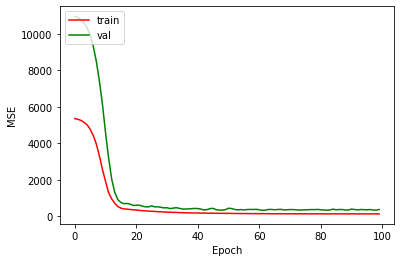

In [16]:
plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_hz.png", dpi=200)


In [17]:
#uncer net
unet = np.sqrt(np.min(model_train.history['val_loss']))
print(np.min(model_train.history['loss']), np.min(model_train.history['val_loss']))
print(model_train.history['loss'][-1], model_train.history['val_loss'][-1])
# 89.80142211914062 433.94439697265625 1000 epochs
# 142.0643768310547 398.6059875488281 500 epochs
# 131.62310791015625 292.6696472167969 100 epochs
# 127.3431625366211 357.522857666015
# 101.05652618408203 233.70008850097656


122.03853607177734 317.01177978515625
123.03045654296875 363.2914733886719


In [18]:
pred = neural_model.predict(z_test)
pred

array([[ 88.29799 ,  18.416397],
       [ 99.77438 ,  20.778347],
       [110.95426 ,  23.106495],
       [112.50081 ,  23.427307],
       [140.6198  ,  29.242708],
       [150.05138 ,  31.189732],
       [173.42618 ,  36.015087]], dtype=float32)

In [19]:
#zor and yor are the original velues for z and [Hz, err]
zor = scalerz.inverse_transform(z.reshape(-1,1))
# yor = scalery.inverse_transform(y)

In [44]:
# ranz = np.random.uniform(0, 2, size=10000)
ranz = np.linspace(0, 2, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = neural_model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
# predy = scalery.inverse_transform(pred_random)


(0.0, 2.0)

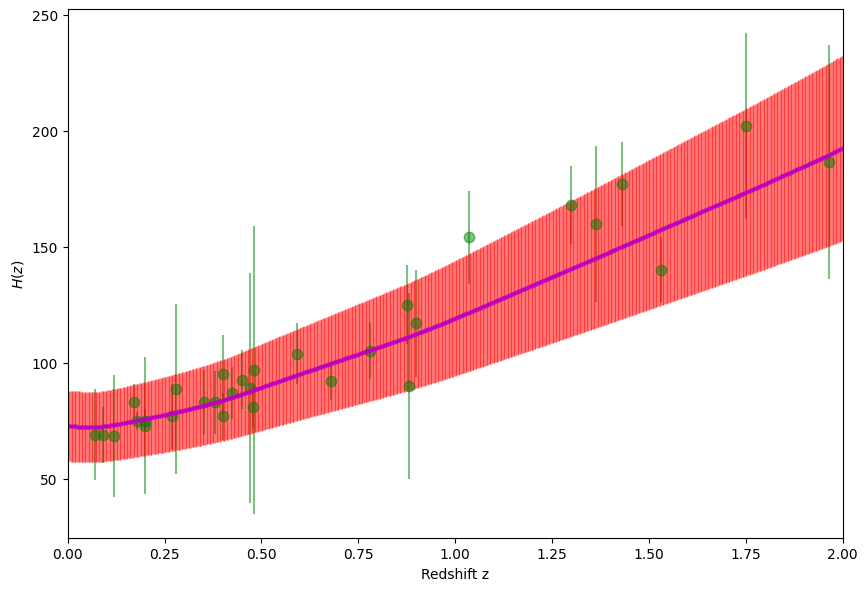

In [45]:
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m')
plt.xlabel("Redshift z")

plt.ylabel("$H(z)$")
plt.xlim(0, 2)
# plt.savefig("500_epochs_HD.png")

In [46]:
# Cosmological constants
Om = 0.27
# variance network


In [47]:
def Hlcdm(z, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

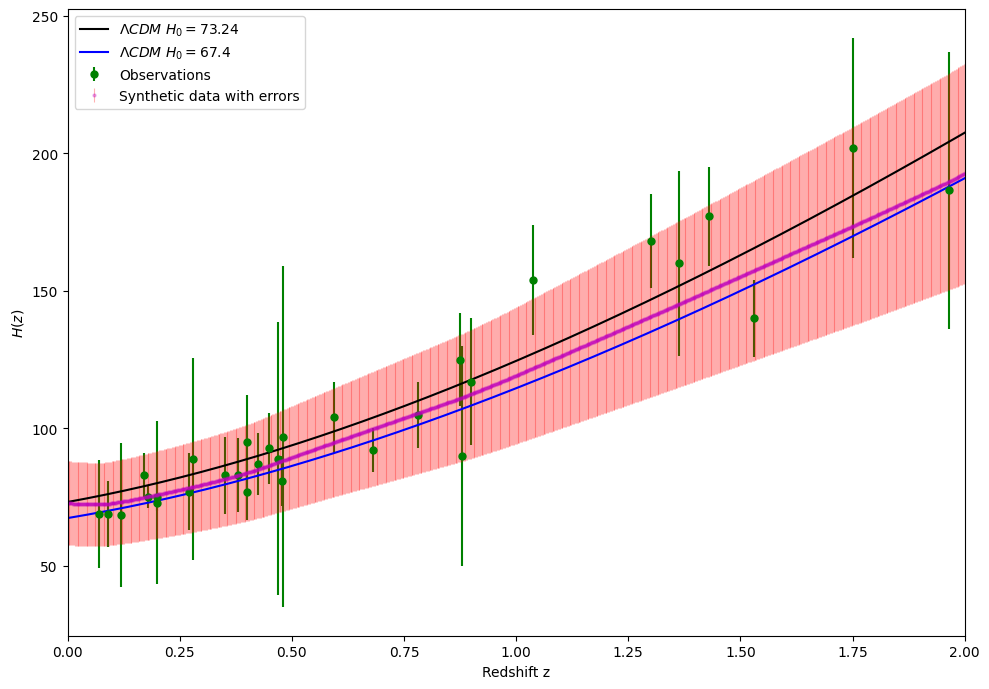

In [49]:
plt.figure(figsize=(10, 7), dpi=100)

zmodel = np.linspace(0, 2, 1000)
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=10, label='Observations')
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')

plt.errorbar(rr, pred_random[:,0], pred_random[:,1], markersize=2., fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with errors')

plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$H(z)$")
plt.xlim(0, 2)
plt.tight_layout()
plt.legend(loc='upper left')

# plt.savefig("SyntheticHDrelu4.png",dpi=800)

In [25]:
pred_random.shape, r.shape

((50, 2), (50, 1))

In [26]:
# randomselection = np.random.randint(0,1000,50)
# randomselection = np.random.randint(0,1000,100)

# rr_reduced = rr[randomselection,:]
# predy_reduced = predy[randomselection,:]

# predy_reduced = pred_random[randomselection,:]
rr_reduced = rr
predy_reduced = pred_random

In [27]:
mookHz = np.concatenate((rr_reduced.reshape(-1,1), predy_reduced), axis=1)


# np.savetxt("autoEncoderHz50.dat",mookHz, delimiter=" ")

In [28]:
predy_reduced[:,1]

array([15.260183, 15.167304, 15.153109, 15.363079, 15.619465, 15.902603,
       16.191296, 16.505775, 16.839006, 17.1962  , 17.587418, 18.049334,
       18.532314, 19.015293, 19.498272, 19.977964, 20.462269, 20.946571,
       21.430874, 21.915176, 22.39943 , 22.885448, 23.399654, 23.952702,
       24.52071 , 25.114815, 25.71558 , 26.316349, 26.91711 , 27.517878,
       28.119438, 28.726608, 29.33378 , 29.940954, 30.552711, 31.168196,
       31.783672, 32.399147, 33.01463 , 33.63011 , 34.245586, 34.86107 ,
       35.476543, 36.092022, 36.71326 , 37.352627, 37.991985, 38.631344,
       39.27273 , 39.978374], dtype=float32)

In [29]:
error  = predy_reduced[:,1]**2
error

array([ 232.8732 ,  230.04712,  229.6167 ,  236.0242 ,  243.96768,
        252.89279,  262.15805,  272.4406 ,  283.55212,  295.7093 ,
        309.31726,  325.77844,  343.4467 ,  361.58136,  380.18262,
        399.11905,  418.70444,  438.75885,  459.28235,  480.27496,
        501.73444,  523.7438 ,  547.5438 ,  573.73193,  601.2652 ,
        630.7539 ,  661.2911 ,  692.55023,  724.5308 ,  757.2336 ,
        790.7028 ,  825.218  ,  860.47064,  896.46075,  933.4682 ,
        971.4564 , 1010.20184, 1049.7047 , 1089.9657 , 1130.9844 ,
       1172.7601 , 1215.2941 , 1258.5851 , 1302.634  , 1347.8635 ,
       1395.2188 , 1443.391  , 1492.3807 , 1542.3474 , 1598.2704 ],
      dtype=float32)

In [30]:
diagcov = np.diag(error) #inverso
# np.savetxt("autoEncoderHz_cov50.dat", diagcov, delimiter= " ", header="#50 50")
np.shape(diagcov)

(50, 50)

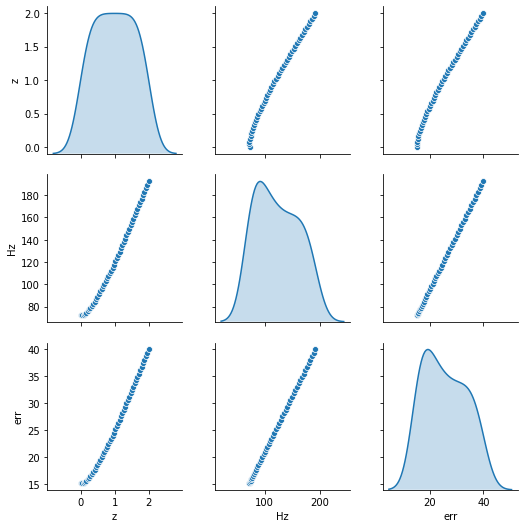

In [31]:
dfMook = pd.DataFrame(mookHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmook.png")

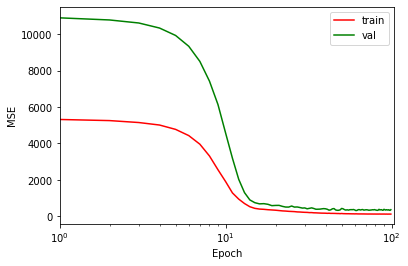

In [32]:
plt.plot(model_train.history['loss'], color='r')
plt.plot(model_train.history['val_loss'], color='g')
plt.xlim(1)
plt.xscale('log')
plt.ylabel('MSE')
# plt.yscale('log')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
# plt.savefig("loss_hz.png", dpi=200)
# plt.savefig("epochs_for_Hz.png", dpi=200)

In [33]:
def model2(input_z):
    x = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    x = Dense(2, activation='linear')(x)


    return elast


input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


#### Now, we not use the statistical error and only use a ANN to given redshift predict $H(z)$. And we estimates its uncertainty with dropout layers.

In [34]:
yy = y[:,0].reshape(-1,1)
zz = z
split = 0.8
ntrain = int(split * len(zz))
indx = [ntrain]
zz_train, zz_test = np.split(zz, indx)
yy_train, yy_test = np.split(yy, indx)
np.shape(zz_train), np.shape(yy_train), np.shape(zz_test), np.shape(yy_test)

((24, 1), (24, 1), (7, 1), (7, 1))

In [35]:
from astroNN.nn.layers import MCDropout

In [36]:
def model_regression_dropout(num_hidden):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    model.add(Dense(units=num_hidden[0], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[1], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[2], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=2, activation="linear"))
    return model

#Define some parameter
batch_size = 4
# optimizer = Adam(lr=.005)
optimizer = Adam(lr=0.0001)


# Compile Keras model
model = model_regression_dropout(num_hidden=[50, 200, 150])
model.compile(loss='mse', optimizer=optimizer) 
# model2_train = model.fit(zz_train, yy_train, 
# #                          validation_split=0.0, 
#                          batch_size=batch_size, epochs=1000, verbose=1,
#                          validation_data=(zz_test, yy_test))    
model2_train = model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=1000,verbose=1,
                                    validation_data=(z_test, y_test))

Epoch 1/1000
6/6 [==============================] - 0s 15ms/step - loss: 5372.4077 - val_loss: 11027.5557
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 5369.6646 - val_loss: 11019.5176
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 5361.5610 - val_loss: 11017.3174
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 5360.2051 - val_loss: 11010.8018
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 5356.8721 - val_loss: 11010.1006
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 5355.2388 - val_loss: 10995.0713
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 5347.4927 - val_loss: 11006.1875
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 5346.6567 - val_loss: 10992.8984
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 5343.3281 - val_loss: 10978.7207
Epoch 10/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 2286.5491 - val_loss: 6809.7769
Epoch 79/1000
6/6 [==============================] - 0s 3ms/step - loss: 2265.8894 - val_loss: 6577.3115
Epoch 80/1000
6/6 [==============================] - 0s 3ms/step - loss: 2263.9089 - val_loss: 6707.0146
Epoch 81/1000
6/6 [==============================] - 0s 3ms/step - loss: 2142.2830 - val_loss: 5951.6499
Epoch 82/1000
6/6 [==============================] - 0s 3ms/step - loss: 2033.9332 - val_loss: 6342.2109
Epoch 83/1000
6/6 [==============================] - 0s 3ms/step - loss: 2122.2783 - val_loss: 6049.2295
Epoch 84/1000
6/6 [==============================] - 0s 3ms/step - loss: 1927.1660 - val_loss: 6365.6650
Epoch 85/1000
6/6 [==============================] - 0s 3ms/step - loss: 2011.1088 - val_loss: 5887.2231
Epoch 86/1000
6/6 [==============================] - 0s 3ms/step - loss: 1729.5703 - val_loss: 6134.8076
Epoch 87/1000
6/6 [==============================] - 0s 3ms/step - lo

Epoch 156/1000
6/6 [==============================] - 0s 3ms/step - loss: 476.0457 - val_loss: 1291.9309
Epoch 157/1000
6/6 [==============================] - 0s 3ms/step - loss: 483.4185 - val_loss: 860.4722
Epoch 158/1000
6/6 [==============================] - 0s 3ms/step - loss: 391.5032 - val_loss: 970.4572
Epoch 159/1000
6/6 [==============================] - 0s 3ms/step - loss: 476.8316 - val_loss: 867.7598
Epoch 160/1000
6/6 [==============================] - 0s 3ms/step - loss: 401.7319 - val_loss: 1417.1769
Epoch 161/1000
6/6 [==============================] - 0s 3ms/step - loss: 355.9302 - val_loss: 969.6963
Epoch 162/1000
6/6 [==============================] - 0s 2ms/step - loss: 664.2316 - val_loss: 773.8658
Epoch 163/1000
6/6 [==============================] - 0s 3ms/step - loss: 391.7292 - val_loss: 866.5074
Epoch 164/1000
6/6 [==============================] - 0s 3ms/step - loss: 521.9947 - val_loss: 1027.0344
Epoch 165/1000
6/6 [==============================] - 0s 3ms/

6/6 [==============================] - 0s 3ms/step - loss: 332.5386 - val_loss: 575.6415
Epoch 235/1000
6/6 [==============================] - 0s 3ms/step - loss: 346.6115 - val_loss: 1168.1547
Epoch 236/1000
6/6 [==============================] - 0s 3ms/step - loss: 392.4670 - val_loss: 548.7230
Epoch 237/1000
6/6 [==============================] - 0s 3ms/step - loss: 443.8980 - val_loss: 925.7982
Epoch 238/1000
6/6 [==============================] - 0s 3ms/step - loss: 320.2708 - val_loss: 804.5019
Epoch 239/1000
6/6 [==============================] - 0s 3ms/step - loss: 434.4809 - val_loss: 1016.5507
Epoch 240/1000
6/6 [==============================] - 0s 3ms/step - loss: 303.6313 - val_loss: 635.2357
Epoch 241/1000
6/6 [==============================] - 0s 3ms/step - loss: 598.6490 - val_loss: 645.0174
Epoch 242/1000
6/6 [==============================] - 0s 3ms/step - loss: 378.8635 - val_loss: 966.1328
Epoch 243/1000
6/6 [==============================] - 0s 3ms/step - loss: 332

Epoch 313/1000
6/6 [==============================] - 0s 3ms/step - loss: 296.2672 - val_loss: 995.8226
Epoch 314/1000
6/6 [==============================] - 0s 3ms/step - loss: 426.6969 - val_loss: 538.6010
Epoch 315/1000
6/6 [==============================] - 0s 3ms/step - loss: 317.2832 - val_loss: 579.4341
Epoch 316/1000
6/6 [==============================] - 0s 3ms/step - loss: 317.9068 - val_loss: 600.2711
Epoch 317/1000
6/6 [==============================] - 0s 3ms/step - loss: 251.6677 - val_loss: 753.1193
Epoch 318/1000
6/6 [==============================] - 0s 3ms/step - loss: 273.6406 - val_loss: 704.1434
Epoch 319/1000
6/6 [==============================] - 0s 3ms/step - loss: 249.3761 - val_loss: 852.7126
Epoch 320/1000
6/6 [==============================] - 0s 3ms/step - loss: 286.6001 - val_loss: 823.6927
Epoch 321/1000
6/6 [==============================] - 0s 3ms/step - loss: 340.1935 - val_loss: 638.0118
Epoch 322/1000
6/6 [==============================] - 0s 3ms/ste

6/6 [==============================] - 0s 3ms/step - loss: 237.8769 - val_loss: 656.2839
Epoch 392/1000
6/6 [==============================] - 0s 3ms/step - loss: 247.5635 - val_loss: 863.1654
Epoch 393/1000
6/6 [==============================] - 0s 3ms/step - loss: 365.0301 - val_loss: 473.3144
Epoch 394/1000
6/6 [==============================] - 0s 3ms/step - loss: 209.5552 - val_loss: 404.7044
Epoch 395/1000
6/6 [==============================] - 0s 3ms/step - loss: 311.7035 - val_loss: 682.1656
Epoch 396/1000
6/6 [==============================] - 0s 3ms/step - loss: 201.4899 - val_loss: 491.4866
Epoch 397/1000
6/6 [==============================] - 0s 3ms/step - loss: 149.7039 - val_loss: 307.8849
Epoch 398/1000
6/6 [==============================] - 0s 3ms/step - loss: 325.1246 - val_loss: 735.3463
Epoch 399/1000
6/6 [==============================] - 0s 4ms/step - loss: 265.8428 - val_loss: 579.8299
Epoch 400/1000
6/6 [==============================] - 0s 4ms/step - loss: 160.9

6/6 [==============================] - 0s 3ms/step - loss: 298.6588 - val_loss: 922.8910
Epoch 470/1000
6/6 [==============================] - 0s 3ms/step - loss: 204.6630 - val_loss: 659.7300
Epoch 471/1000
6/6 [==============================] - 0s 3ms/step - loss: 308.0956 - val_loss: 574.1161
Epoch 472/1000
6/6 [==============================] - 0s 3ms/step - loss: 221.6479 - val_loss: 775.6334
Epoch 473/1000
6/6 [==============================] - 0s 3ms/step - loss: 216.6729 - val_loss: 830.4520
Epoch 474/1000
6/6 [==============================] - 0s 3ms/step - loss: 272.3749 - val_loss: 645.1502
Epoch 475/1000
6/6 [==============================] - 0s 3ms/step - loss: 262.8674 - val_loss: 965.3907
Epoch 476/1000
6/6 [==============================] - 0s 3ms/step - loss: 229.4860 - val_loss: 852.1441
Epoch 477/1000
6/6 [==============================] - 0s 2ms/step - loss: 173.7182 - val_loss: 503.6684
Epoch 478/1000
6/6 [==============================] - 0s 3ms/step - loss: 343.0

Epoch 548/1000
6/6 [==============================] - 0s 3ms/step - loss: 321.2611 - val_loss: 515.4343
Epoch 549/1000
6/6 [==============================] - 0s 3ms/step - loss: 292.2473 - val_loss: 817.3654
Epoch 550/1000
6/6 [==============================] - 0s 3ms/step - loss: 190.2486 - val_loss: 501.4359
Epoch 551/1000
6/6 [==============================] - 0s 3ms/step - loss: 465.8307 - val_loss: 663.2289
Epoch 552/1000
6/6 [==============================] - 0s 3ms/step - loss: 168.4343 - val_loss: 522.5541
Epoch 553/1000
6/6 [==============================] - 0s 3ms/step - loss: 187.9947 - val_loss: 501.3690
Epoch 554/1000
6/6 [==============================] - 0s 3ms/step - loss: 135.4707 - val_loss: 648.6855
Epoch 555/1000
6/6 [==============================] - 0s 3ms/step - loss: 235.6542 - val_loss: 426.1117
Epoch 556/1000
6/6 [==============================] - 0s 3ms/step - loss: 145.5180 - val_loss: 558.8903
Epoch 557/1000
6/6 [==============================] - 0s 3ms/ste

6/6 [==============================] - 0s 3ms/step - loss: 200.4651 - val_loss: 1245.9293
Epoch 627/1000
6/6 [==============================] - 0s 3ms/step - loss: 214.9214 - val_loss: 856.1918
Epoch 628/1000
6/6 [==============================] - 0s 3ms/step - loss: 200.0994 - val_loss: 718.6317
Epoch 629/1000
6/6 [==============================] - 0s 3ms/step - loss: 242.3636 - val_loss: 471.8441
Epoch 630/1000
6/6 [==============================] - 0s 3ms/step - loss: 221.6462 - val_loss: 634.5336
Epoch 631/1000
6/6 [==============================] - 0s 3ms/step - loss: 286.5887 - val_loss: 444.1451
Epoch 632/1000
6/6 [==============================] - 0s 3ms/step - loss: 315.7065 - val_loss: 580.4795
Epoch 633/1000
6/6 [==============================] - 0s 3ms/step - loss: 189.1547 - val_loss: 386.3945
Epoch 634/1000
6/6 [==============================] - 0s 3ms/step - loss: 210.8590 - val_loss: 856.0810
Epoch 635/1000
6/6 [==============================] - 0s 3ms/step - loss: 303.

Epoch 705/1000
6/6 [==============================] - 0s 3ms/step - loss: 156.5661 - val_loss: 295.2229
Epoch 706/1000
6/6 [==============================] - 0s 3ms/step - loss: 167.1398 - val_loss: 308.2985
Epoch 707/1000
6/6 [==============================] - 0s 3ms/step - loss: 271.7525 - val_loss: 532.6432
Epoch 708/1000
6/6 [==============================] - 0s 3ms/step - loss: 166.1030 - val_loss: 569.1906
Epoch 709/1000
6/6 [==============================] - 0s 3ms/step - loss: 250.9559 - val_loss: 446.4993
Epoch 710/1000
6/6 [==============================] - 0s 3ms/step - loss: 245.2895 - val_loss: 655.3252
Epoch 711/1000
6/6 [==============================] - 0s 3ms/step - loss: 205.4009 - val_loss: 567.4811
Epoch 712/1000
6/6 [==============================] - 0s 3ms/step - loss: 187.9104 - val_loss: 380.5283
Epoch 713/1000
6/6 [==============================] - 0s 3ms/step - loss: 178.0204 - val_loss: 547.4308
Epoch 714/1000
6/6 [==============================] - 0s 3ms/ste

Epoch 784/1000
6/6 [==============================] - 0s 3ms/step - loss: 184.9159 - val_loss: 388.3140
Epoch 785/1000
6/6 [==============================] - 0s 3ms/step - loss: 256.9173 - val_loss: 600.2314
Epoch 786/1000
6/6 [==============================] - 0s 3ms/step - loss: 212.3943 - val_loss: 538.6503
Epoch 787/1000
6/6 [==============================] - 0s 3ms/step - loss: 190.8515 - val_loss: 311.5219
Epoch 788/1000
6/6 [==============================] - 0s 3ms/step - loss: 301.8344 - val_loss: 284.5779
Epoch 789/1000
6/6 [==============================] - 0s 3ms/step - loss: 160.7203 - val_loss: 389.3244
Epoch 790/1000
6/6 [==============================] - 0s 3ms/step - loss: 185.1234 - val_loss: 364.7318
Epoch 791/1000
6/6 [==============================] - 0s 3ms/step - loss: 176.2845 - val_loss: 465.6980
Epoch 792/1000
6/6 [==============================] - 0s 3ms/step - loss: 213.3156 - val_loss: 498.5859
Epoch 793/1000
6/6 [==============================] - 0s 3ms/ste

Epoch 863/1000
6/6 [==============================] - 0s 3ms/step - loss: 227.0867 - val_loss: 608.4644
Epoch 864/1000
6/6 [==============================] - 0s 3ms/step - loss: 229.1560 - val_loss: 527.1911
Epoch 865/1000
6/6 [==============================] - 0s 3ms/step - loss: 256.7866 - val_loss: 574.2777
Epoch 866/1000
6/6 [==============================] - 0s 3ms/step - loss: 221.5550 - val_loss: 495.3377
Epoch 867/1000
6/6 [==============================] - 0s 3ms/step - loss: 216.7437 - val_loss: 417.6475
Epoch 868/1000
6/6 [==============================] - 0s 3ms/step - loss: 213.6218 - val_loss: 440.2523
Epoch 869/1000
6/6 [==============================] - 0s 3ms/step - loss: 210.0617 - val_loss: 793.6110
Epoch 870/1000
6/6 [==============================] - 0s 3ms/step - loss: 164.8998 - val_loss: 450.5203
Epoch 871/1000
6/6 [==============================] - 0s 3ms/step - loss: 285.6342 - val_loss: 504.3758
Epoch 872/1000
6/6 [==============================] - 0s 3ms/ste

6/6 [==============================] - 0s 3ms/step - loss: 239.7253 - val_loss: 703.2344
Epoch 942/1000
6/6 [==============================] - 0s 3ms/step - loss: 217.1577 - val_loss: 473.0546
Epoch 943/1000
6/6 [==============================] - 0s 3ms/step - loss: 163.7025 - val_loss: 574.4658
Epoch 944/1000
6/6 [==============================] - 0s 3ms/step - loss: 192.4778 - val_loss: 408.3767
Epoch 945/1000
6/6 [==============================] - 0s 3ms/step - loss: 182.6501 - val_loss: 390.3960
Epoch 946/1000
6/6 [==============================] - 0s 3ms/step - loss: 191.0929 - val_loss: 660.1761
Epoch 947/1000
6/6 [==============================] - 0s 3ms/step - loss: 200.0552 - val_loss: 486.0140
Epoch 948/1000
6/6 [==============================] - 0s 3ms/step - loss: 153.7937 - val_loss: 397.4815
Epoch 949/1000
6/6 [==============================] - 0s 3ms/step - loss: 181.5678 - val_loss: 521.5031
Epoch 950/1000
6/6 [==============================] - 0s 3ms/step - loss: 195.5

In [57]:
# Generate test data
test_batch_size = 1000
# x_test = np.random.uniform(0, 2., test_batch_size)
x_test = np.linspace(0, 2., test_batch_size)

mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))
    
# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)

In [58]:
np.mean(std_mc_dropout[:,0]), np.mean(std_mc_dropout[:,1])

(15.332541536599178, 4.744201150633817)

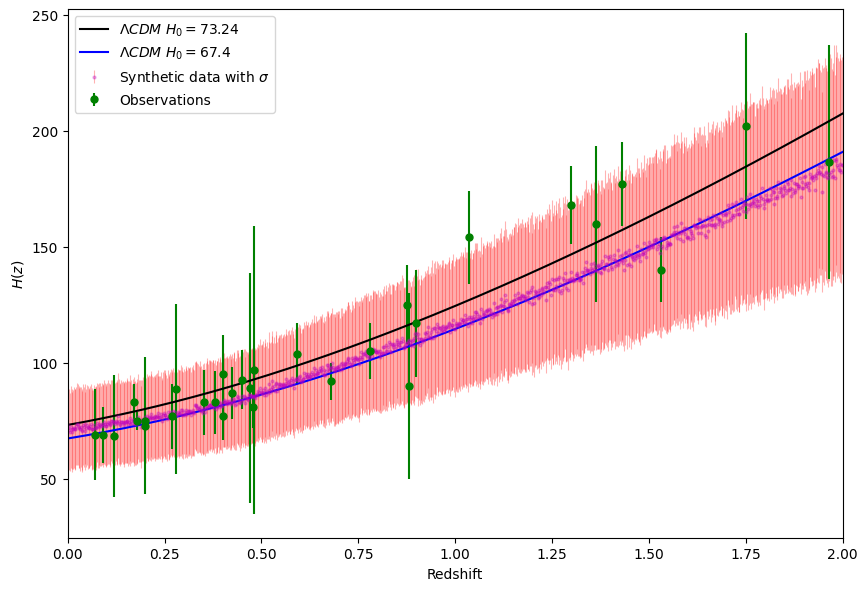

In [53]:
# Plotting
plt.figure(figsize=(10, 7), dpi=100)
# plt.figure(figsize=(5, 4), dpi=100)
sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)
plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.3, c='m',
             label='Synthetic data with $\sigma$')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')
plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(0,2)
plt.xlabel('Redshift')
plt.ylabel('$H(z)$')
# plt.legend(loc='best')
plt.legend(loc='upper left')
# plt.show()
# plt.savefig('Hz_dropout200.png', dpi=100)

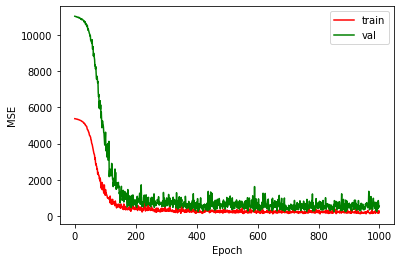

In [54]:
plt.plot(model2_train.history['loss'], color='r')
plt.plot(model2_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
# plt.xscale('log')
plt.legend(['train', 'val'], loc='upper right')
# plt.savefig('lossHzdropout10mil.png', dpi=100)

In [41]:
mookdpHz = np.concatenate((x_test.reshape(-1,1), prediction_mc_dropout), axis=1)

# np.savetxt("autoEncoderHz50dropout.dat",mookdpHz, delimiter=" ")

In [42]:
diagcov2 = np.diag(sigma**2) #inverso
# np.savetxt("autoEncoderHz_cov50dropout.dat", diagcov2, delimiter= " ", header="#50 50")

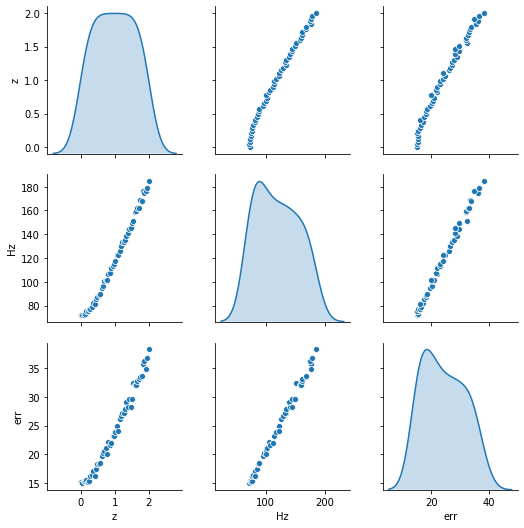

In [43]:
dfMook = pd.DataFrame(mookdpHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("50hdmookdropout.png")